In [ ]:
#차원과 차원축소
#사진의 경우 10,000개의 픽셀이 있으면 10,000개의 특성이 있는 셈
#특성 = 차원 , 즉 10,000개의 차원이 있다는 말이 됨
#저장공간 절약을 위해서는 차원 축소가 필요함

In [ ]:
#다차원: 차원은 배열의 축 개수
#벡터: 차원은 원소의 개수(차원이라는 명칭을 특성으로 바꿔 사용해도 무방함)
#sklearn에서 PAC 모델 훈련하면 자동으로 특성마다 평균값을 때서 원점에 맞춰줌
#주성분: 분산이 가장 큰 방향을 나타내는 축(단위벡터)
#일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음

In [ ]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) #2차원 배열로 바꿈, 머신러닝 활용하기 위해

--2025-11-13 16:12:03--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-13 16:12:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-13 16:12:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

In [20]:
print(pca.components_.shape)  
#축소된 주성분(차원) 50개(분산 설명하는 축 50개), 원본 차원수 10000개

(50, 10000)


In [26]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))   #한 줄에 10개씩 이미지 그림, 행개수 n/10
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap= 'gray')
            axs[i,j].axis('off')
    plt.show()
    
import matplotlib.pyplot as plt
def draw_fruit(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))   #한 줄에 10개씩 이미지 그림, 행개수 n/10
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap= 'gray_r')
            axs[i,j].axis('off')
    plt.show()

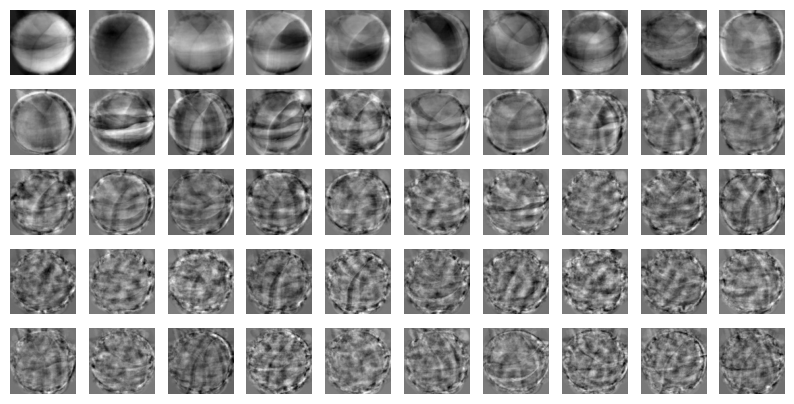

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
draw_fruit(pca.components_.reshape(-1, 100, 100))
#원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것(원본 데이터의 차원을 줄인건 아님)
#주성분을 찾았으므로 이제 원본 데이터의 차원을 50으로 줄이기!

#가로로 만들어보기 ✅✅✅✅✅✅✅✅✅✅✅✅✅

In [ ]:
print(fruits_2d.shape)  #원본 shape
fruits_pca = pca.transform(fruits_2d)
print()
print(fruits_pca.shape) 
#원본을 주성분 분석한 값으로 transform 시킨 것,, 특성(픽셀, 주성분) 50개로 줄었음
#10000개의 픽셀 중 50개만 남은 건 아니고.,, 10000개의 특성을 담는 50개의 주성분으로
#축소 된거라고 생각

(300, 10000)

(300, 50)


In [ ]:
#데이터를 재구성할때는 분산이 큰 방향으로 데이터를 투영하면 
#최대한 원본 데이터의 상당 부분을 재구성 할 수 있음

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)  #원본 데이터 복원


(300, 10000)


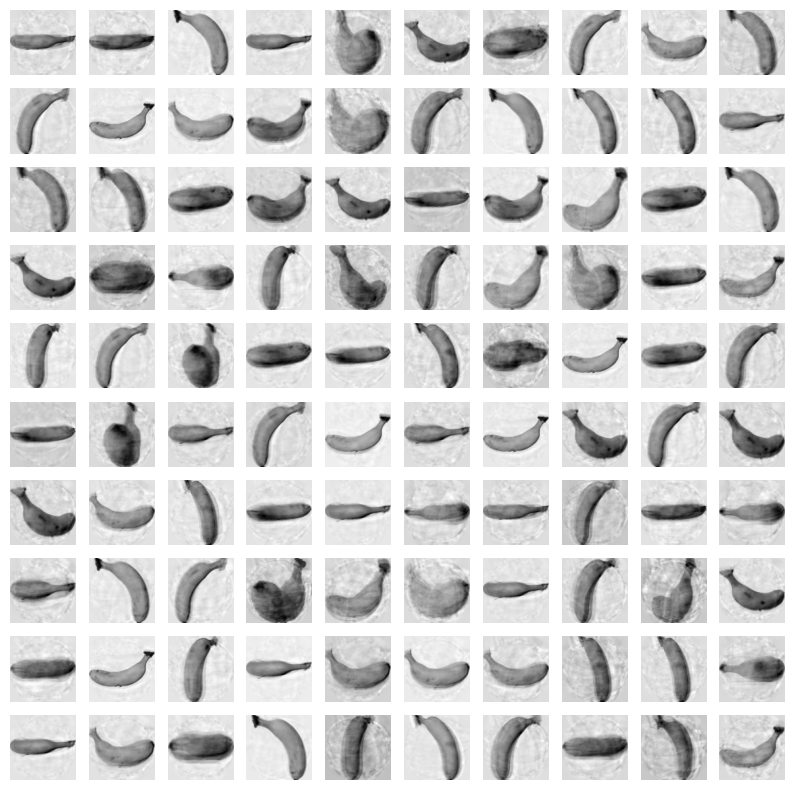

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100) #3차원 변환
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

#해상도가 떨어지긴 함

In [ ]:
#설명된 분산: 주성분이 원본 데이터를 얼마나 잘 나타냈는지 나타내는 값

print(np.sum(pca.explained_variance_ratio_))
#pca,, fruits_2d 데이터를 주성분 50개로 축소한 자료 

0.9215146766226151
(50,)


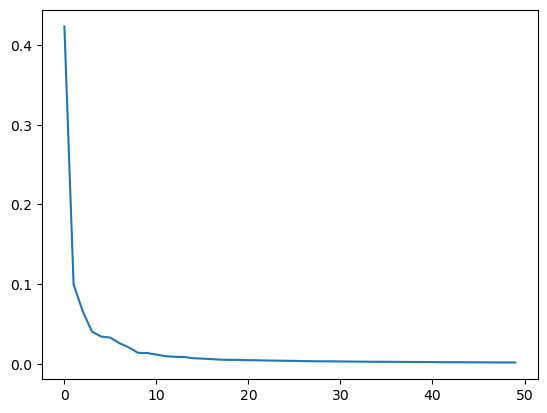

(50,)


In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show() 

#plt.plot은 1차원 데이터를 입력받으면 x축의 값을 자동으로 생성함
#y축은 내가 제공한 값, x축은 자동으로 배열의 길이에 맞춰서 ,, 여기서는 50
#주성분의 번호가 뒷번호(가중치가 적은,,)일수록 해당 주성분이 설명하는 원본 데이터 정보량(분산)이 줄어든다

print(pca.explained_variance_ratio_.shape)

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#실행 할 때마다 왜 결과가 다르지 ✅✅✅✅

0.9966666666666667
0.10067257881164551


In [60]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.00618448257446289


In [61]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [69]:
print(pca.n_components_)

2


In [70]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [77]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.01162862777709961


/root/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


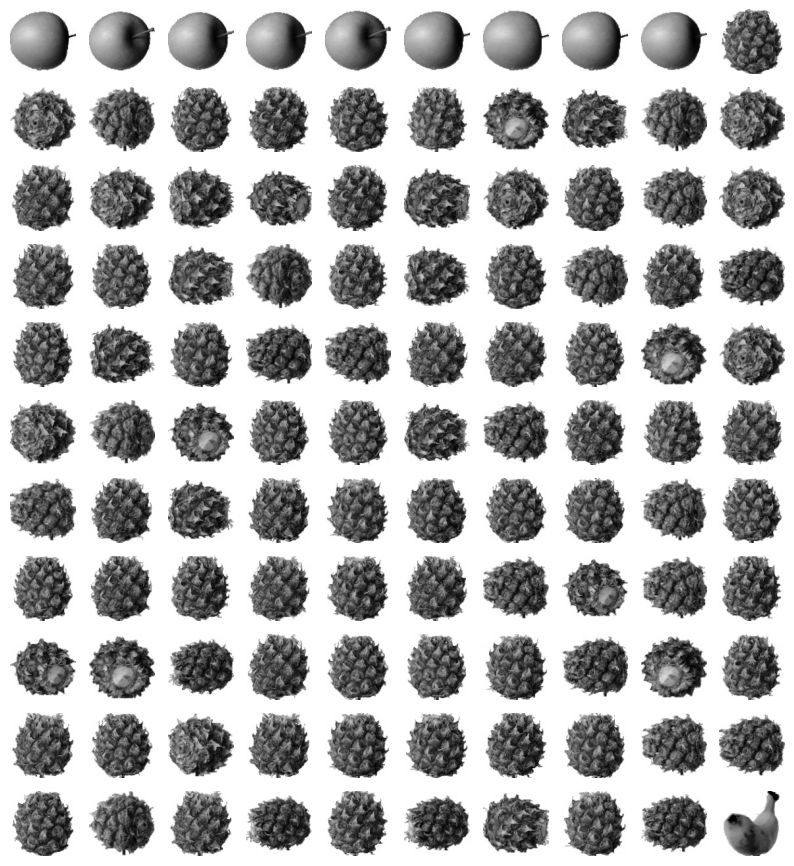

In [79]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_==label])
    print("\n")

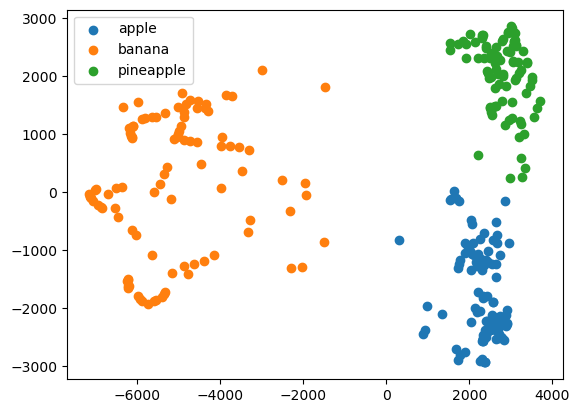

In [81]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()